In [1]:
import matplotlib.pyplot as plt
f = open('ckpts/init_lr=0.001_hidden_dims=2000_weight_decay=1e-05.txt',"r")
data = f.readlines()
f.close()

In [4]:
train = []
valid = []
test = []
for i in data:
    if 'training set accuracy' in i:
        i = i.strip().split(' ')
        train.append(float(i[-1]))
    elif 'validation set accuracy' in i:
        i = i.strip().split(' ')
        valid.append(float(i[-1]))
    elif 'test set accuracy' in i:
        i = i.strip().split(' ')
        test.append(float(i[-1]))

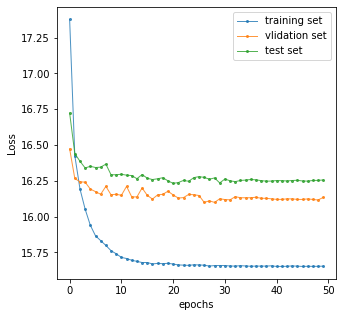

In [10]:

plt.figure(figsize=(5,5))
x_axis_data = [i for i in range(len(test))]


plt.plot(x_axis_data, train, 'o-', alpha=0.8, linewidth=1, label='training set', markersize=2)
plt.plot(x_axis_data, valid, 'o-', alpha=0.8, linewidth=1, label='vlidation set', markersize=2)
plt.plot(x_axis_data, test, 'o-', alpha=0.8, linewidth=1, label='test set', markersize=2)
plt.legend(loc="upper right")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
valid = []
test = []
for i in data:
    if 'validation set accuracy' in i:
        i = i.strip().split(' ')
        valid.append(float(i[3][:-2]))
    elif 'test set accuracy' in i:
        i = i.strip().split(' ')
        test.append(float(i[3][:-2]))

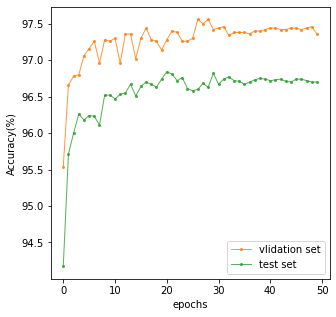

In [17]:
plt.figure(figsize=(5,5))
x_axis_data = [i for i in range(len(test))]

plt.plot(x_axis_data, valid, 'o-', alpha=0, linewidth=1, markersize=2)
plt.plot(x_axis_data, valid, 'o-', alpha=0.8, linewidth=1, label='vlidation set', markersize=2)
plt.plot(x_axis_data, test, 'o-', alpha=0.8, linewidth=1, label='test set', markersize=2)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy(%)')
plt.show()

In [36]:
import pickle
with open('ckpts/init_lr=0.001_hidden_dims=2000_weight_decay=1e-05.pkl', 'rb') as file:
    parameters = pickle.load(file)

In [37]:
W1 = parameters['W1']
W1 = W1.reshape((2000, 28, 28))

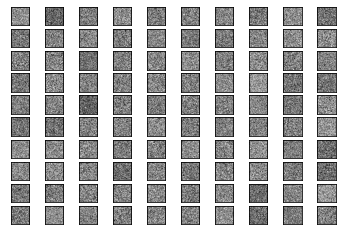

In [38]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
gs = gridspec.GridSpec(10, 10)
# gs.update(wspace=0.8)
for i in range(10):
    for j in range(10):
        ax1 = plt.subplot(gs[i, j])
        ax1.imshow(W1[i * 10 + j], cmap = plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
plt.show()

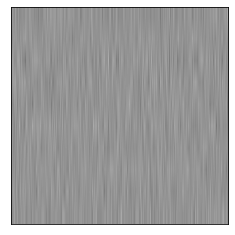

In [49]:
import cv2
W2 = parameters['W2']
W2 = cv2.resize(W2, (2000, 2000), cv2.INTER_NEAREST)
plt.imshow(W2, cmap = plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()